# Logistička regresija

**"A statistical model that uses a logistic function to model a binary dependent variable"**

# Pregled
* Binarna klasifikacija
* Logistička regresija
* Evaluacija modela
* Multinomijalna (multiclass) klasifikacija

# Binarna klasifikacija

U problemima **klasifikacije** izlazni podaci su diskretnog tipa i nazivamo ih **klase**. Dakle, treba naučiti funkciju koja ispravno klasifikuje ulazne podatke (sa proizvoljno mnogo feature-a) u neku od tih klasa.

Ako je klasifikacija **binarna** postoji tačno dve klase, koje se često označavaju sa 0 (negativna klasa) i 1 (pozitivna klasa).



# Logistička regresija

* **Logistička regresija** (Logistic Regression) je metod za rešavanje problema binarne klasifikacije
* **Hipoteza (model)**: $h_\theta(X)=S(X\Theta + bias)$
  * $S$ je **logistička funkcija** (sigmoid): $S(x) = \frac{1}{1+e^{-x}}$
  * Logistička funkcija mapira realne vrednosti u interval od 0 do 1
  * Izlaz ove funkcije ćemo tretirati kao **verovatnoću da uneti primer pripada klasi 1**
  * Sada možemo definisati **granicu odluke** kao vrednost iznad koje ćemo primere tretirati kao "pozitivne"
  * $h_\theta(X) \ge 0.5 \implies klasa = 1$
  * $h_\theta(X) < 0.5 \implies klasa = 0$
* Sada naša stara loss funkcija nema mnogo smisla, pa koristimo **Cross Entropy Loss** (Log Loss):
  * $J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} Cost(h_\Theta(x^{(i)}), y^{(i)})$
  * $Cost(h_\Theta(x), y) = -\log(h_\Theta(x))$ za $y=1$
  * $Cost(h_\Theta(x), y) = -\log(1 - h_\Theta(x))$ za $y = 0$
  * Kao jedan izraz, da bismo zaobišli potrebu za grananjem, $Cost$ se može zapisati ovako (uvek je tačno jedan sabirak jednak nuli):
    * $Cost(h_\Theta(x), y) = -y~log(h_\Theta(x))-(1-y)\log(1-h_\Theta(x))$ 
* Za optimizaciju i trening koristimo iste procedure
* [Više o logističkoj regresiji](https://mcerovic.github.io/notes/LogisticRegression/index.html)
* [Više o log loss funkciji troška](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

## Primer

Dat je skup podataka **logreg_data.csv** sa 200 trening primera i 2 ulazna feature-a. Za svaki primer data je klasa kom pripada (0 ili 1).

Nad ovim skupom podataka istreniraćemo logističku regresiju koja treba da vrši klasifikaciju novih, nepoznatih primera.


Epoch: 10/100| Avg loss: 0.17891
Epoch: 20/100| Avg loss: 0.15608
Epoch: 30/100| Avg loss: 0.14866
Epoch: 40/100| Avg loss: 0.14522
Epoch: 50/100| Avg loss: 0.14336
Epoch: 60/100| Avg loss: 0.14225
Epoch: 70/100| Avg loss: 0.14156
Epoch: 80/100| Avg loss: 0.14110
Epoch: 90/100| Avg loss: 0.14079
Epoch: 100/100| Avg loss: 0.14058
w =  [3.4555976 2.8194766] bias =  -0.052243117
Checkpoint sacuvan


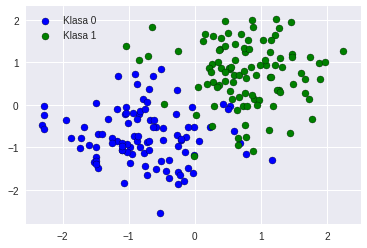

In [39]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# Korak 1: Učitavanje i obrada podataka.
filename = 'logreg_data.csv'
all_data = np.loadtxt(filename, delimiter=',')
data = dict()
data['x'] = all_data[:, :2]
data['y'] = all_data[:, 2]
nb_features = 2

# Nasumično mešanje.
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija. Ne normalizujemo y!
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
# data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

# Iscrtavanje.
idxs = data['y'] == 0.0
plt.scatter(data['x'][idxs, 0], data['x'][idxs, 1], c='b', 
            edgecolors='k', label='Klasa 0')
plt.scatter(data['x'][~idxs, 0], data['x'][~idxs, 1], c='g', 
            edgecolors='k', label='Klasa 1')
plt.legend()

# Korak 2: Model.
X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
Y = tf.placeholder(shape=(None), dtype=tf.float32)
w = tf.Variable(tf.zeros(nb_features))
bias = tf.Variable(0.0)

w_col = tf.reshape(w, (nb_features, 1))
hyp = tf.sigmoid(tf.add(tf.matmul(X, w_col), bias))

# Korak 3: Funkcija troška i optimizacija.
Y_col = tf.reshape(Y, (-1, 1))
loss = tf.reduce_mean(-tf.multiply(Y, tf.log(hyp)) 
                      -tf.multiply(1.0-Y, tf.log(1.0-hyp)))

opt_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga.
  nb_epochs = 100
  for epoch in range(nb_epochs):
    epoch_loss = 0
    for sample in range(nb_samples):
      feed = {X: data['x'][sample].reshape((1, nb_features)), 
              Y: data['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      epoch_loss += curr_loss
        
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    epoch_loss /= nb_samples
    if (epoch + 1) % 10 == 0:
      print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                              epoch_loss))
 
  # Ispisujemo finalnu vrednost parametara.
  w_val = sess.run(w)
  bias_val = sess.run(bias)
  print('w = ', w_val, 'bias = ', bias_val)
  
  # Čuvamo model za potrebe vizualizacije.
  saver = tf.train.Saver()
  saver.save(sess, '/tmp/log_reg.ckpt')
  print('Checkpoint sacuvan')

Rezultate ćemo prikazati na grafiku na tri načina, kako bismo bolje razumeli smisao granice odluke i sigmoidne funkcije:

1. Izračunaćemo vrednost hipoteze za uniformno raspoređenu rešetku tačaka u prostoru $[-3, 3] \times [-3, 3]$. Kako je vrednost hipoteze u intervalu $[0, 1]$ ovo ćemo prikazati kolormapom, pri čemu boja bliža zelenoj označava veću verovatnoću da je ta tačka u klasi 1. Ovo može da nagovesti granicu odluke.

2.  Analitički ćemo odrediti granicu odluke. Tačka je na granici odluke ako je vrednost hipoteze tačno 0.5 tj. $0.5 = h_\Theta(X) = S(X\Theta+bias) = S(x_2*\theta_2 + x_1*\theta_1 + bias)$. Iz grafika sigmoidne funkcije znamo da ima vrednost 0.5 samo u tački 0 pa je prethodni uslov ekvivalentan tome da je $x_2*\theta_2 + x_1*\theta_1 + bias = 0$. Sada ako izrazimo $x_2$ preko $x_1$ dobijamo $x_2 = \frac{-bias-x_1\theta_1}{\theta_2} = \frac{-bias}{\theta_2} + \frac{-\theta_1}{\theta_2}x_1$. Ovo je jednačina prave koja predstavlja granicu odluke i crtamo je crvenom bojom.

3. Prikazaćemo podatke u 3 dimenzije ($x1, x2, y$). Treća dimenzija ($y$) označava klasu pa ćemo imati tačke iz trening skupa samo na koordinatama 0 i 1. Ipak, ovo nam omogućava da vrednosti hipoteze prikažemo u prostoru. Sada se lako vidi da je prostor koji hipoteza definiše "ravan deformisana sigmoidom" što ilustruje činjenicu da je korišćeni model (samo) linearna regresija nad kojom je primenjen sigmoid. U skladu sa prethodnom analizom, granica odluke je presek "deformisane ravni" sa $y = 0.5$. Tu ravan crtamo belom, a granicu odluke crvenom bojom.

Kod ispod pokretati nakon treniranja modela.



## Prikaz rezultata

INFO:tensorflow:Restoring parameters from /tmp/log_reg.ckpt
Checkpoint ucitan
w =  [3.4546  2.81781] bias =  -0.072235264


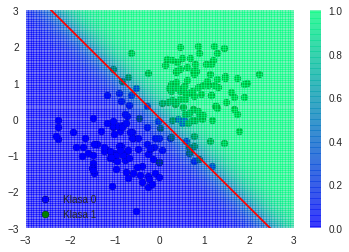

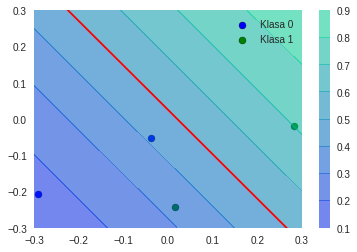

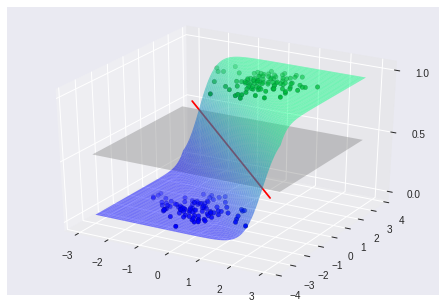

In [0]:
# Pomocna funkcija koja crta grafik za vrednosti hipoteze i granicu
# odluke na prostoru zadatom sa xlim i ylim. use_contour odredjuje tip grafika.
def plot_12(xlim, ylim, use_contour = False):
  # Crtamo podatke.
  idxs = data['y'] == 0.0
  plt.scatter(data['x'][idxs, 0], data['x'][idxs, 1], c='b', 
              edgecolors='k', label='Klasa 0')
  plt.scatter(data['x'][~idxs, 0], data['x'][~idxs, 1], c='g', 
              edgecolors='k', label='Klasa 1')
  
  # Crtamo vrednosti hipoteze.
  x1s, x2s = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), 
                         np.linspace(ylim[0], ylim[1], 100))
  xs = np.column_stack([np.ravel(x1s), np.ravel(x2s)])
  hyp_val = np.ravel(sess.run(hyp, feed_dict={X: xs}))
  plot_fn = plt.contourf if use_contour else plt.pcolor
  plot_fn(x1s, x2s, hyp_val.reshape(100, 100), 
             alpha=0.5, vmin=0, vmax=1, cmap='winter')
  
  # Crtamo granicu odluke.
  xs = np.linspace(xlim[0], xlim[1], 10)
  ys = (-bias_val - xs*w_val[0]) / w_val[1]
  plt.plot(xs.tolist(), ys.tolist(), color='r')
  
  # Podesavanja za grafik.
  plt.grid(False)
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.legend()
  plt.colorbar()
  plt.show()

# Pomocna funkcija koja crta 3D grafik sa podacima, vrednostima hipoteze i
# granicom odluke.
def plot_3(xlim, ylim):
  # Crtamo podatke.
  from mpl_toolkits.mplot3d import Axes3D
  ax = Axes3D(plt.figure())
  ax.scatter(data['x'][idxs, 0], data['x'][idxs, 1], 0, c='b', 
              edgecolors='k', label='Klasa 0')
  ax.scatter(data['x'][~idxs, 0], data['x'][~idxs, 1], 1, c='g', 
              edgecolors='k', label='Klasa 1')
  ax.zaxis.set_ticks([0, 0.5, 1])
  
  # Crtamo vrednosti hipoteze.
  x1s, x2s = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), 
                         np.linspace(ylim[0], ylim[1], 100))
  xs = np.column_stack([np.ravel(x1s), np.ravel(x2s)])
  hyp_val = np.ravel(sess.run(hyp, feed_dict={X: xs}))
  ax.plot_surface(x1s, x2s, hyp_val.reshape(100, 100), cmap='winter',
                  alpha=0.5)
  
  # Crtamo ravan na visini 0.5.
  ax.plot_surface(np.asarray([[-3, -3], [3, 3]]),
                  np.asarray([[-3, 3], [-3, 3]]),
                  np.full((2, 2), 0.5), color='w', alpha=0.4)
  
  # Crtamo granicu odluke.
  xs = np.linspace(xlim[0], xlim[1], 10)
  ys = (-bias_val - xs*w_val[0]) / w_val[1]
  zs = np.full(xs.shape, 0.5)
  ax.plot(xs.tolist(), ys.tolist(), zs.tolist(), color='r')
  
  plt.show()

# Glavni deo koda.    
saver = tf.train.Saver()
with tf.Session() as sess:
  # Ucitavanje modela.
  saver.restore(sess, '/tmp/log_reg.ckpt')
  print('Checkpoint ucitan')
  w_val = sess.run(w)
  bias_val = sess.run(bias)
  print('w = ', w_val, 'bias = ', bias_val)
  
  # Grafik vrednosti hipoteze i granice odluke.
  plot_12((-3, 3), (-3, 3))
  
  # Slicno ali zumirano.
  plot_12((-0.3, 0.3), (-0.3, 0.3), use_contour = True)
  
  # 3D grafik.
  plot_3((-3, 3), (-3, 3))

#Evaluacija modela

Do sada smo kvalitet modela procenjivali "odokativno", pogledom na grafik ili funkciju troška. Iako nekada jeste, često samo iz grafika nije jasno koliko je model uspešan, a sama vrednost funkcije troška nema značenje ako se ne uporedi sa nečim, pa jedino što možemo posmatrati kao znak napretka modela je da funkcija troška opada. Ipak, čak i to nije uvek dobar znak (overfitting).

Uvedimo zato malo formalniji pristup evaluaciji modela. Ovo možemo odmah primeniti, ali će biti naročito korisno kada budemo radili sa kompleksnijim klasama modela, gde je neophodno na precizan način uporediti nekoliko alternativa.

*  Svaki skup podataka nad kojim radimo delimo na tri dela: **Trening skup** (npr. oko 60% podataka), **validacioni skup** (npr. oko 20% podataka, može se izbeći metodom krosvalidacije) i **test skup** (npr. oko 20% podataka)
* Nakon toga, pratimo sledeću proceduru:
  * Svaki model treniramo isključivo na **trening skupu**
  * Različite modele koje razmatramo za isti probleme, ili varijacije istog modela (drukčiji hiperparametri, npr. stepen polinoma u linearnoj regresiji) poredimo na osnovu određenih metrika na **validacionom skupu**, i biramo najbolji
  * Odabrani model konačno i finalno "bodujemo" na osnovu rezultata istih metrika na **test skupu**; nakon ovoga **ne smemo** dalje trenirati model niti menjati parametre - ovo je finalni rezultat

Postojanje ove podele je važno da bi se obavila fer i nepristrasna evaluacija.  


Postavlja se pitanje koje metrike koristimo. Uvek možemo koristiti samu funkciju troška (MSE ili log loss) ali se u problemima binarne klasifikacije koristi i **accuracy**

Ako uvedemo oznake:
* TP = True Positive, primeri iz klase 1 koje naš model uspešno dodeljuje klasi 1
* TN = True Negative, primeri iz klase 0 koje naš model uspešno dodeljuje klasi 0
* FP = False Positive, primeri iz klase 0 koje naš model neuspešno dodeljuje klasi 1
* FN = False Negative, primeri iz klase 1 koje naš model neuspešno dodeljuje klasi 0
* M = ukupan broj primera
onda se **accuracy** definiše kao: $\frac{TP + TN}{M}$, dakle deo skupa koji je pravilno kategorisan.

Accuracy nije dobra metrika u slučaju kada npr. klasi 1 pripada veoma mali procenat primera (npr. 1%). Tada će trivijalan model koji sve moguće primere dodeljuje klasi 0 imati accuracy od **0.99**. Zbog toga se uvode:
* Precision (P) = $\frac{TP}{TP+FP}$ tj. tačno klasifikovani iz klase 1 u odnosu na sve klasifikovane kao klasa 1
* Recall (R) = $\frac{TP}{TP+FN}$, tj. tačno klasifikovani iz klase 1 u odnosu na sve iz klase 1
* F1 skor = $2\frac{PR}{P+R}$, kao kombinacija precision i recall izražena jednom veličinom
Sada je u primeru od malopre recall jednak nuli, a precision nije definisan.

Pored toga često se kao alat koristi **PR curve**: grafik koji prikazuje vrednosti precision-a i recall-a u zavisnosti od praga koji primenjujemo na hipotezu. Rekli smo da je 0.5 podrazumevana vrednost za prag, ali uz PR curve možemo imati više kontrole i u zavisnosti od toga koliko nam je važan precision ili recall za naš problem možemo favorizovati jednu, odnosno drugu metriku.


## Prethodni primer sa podelom skupa i metrikama

Epoch: 10/100| Train loss: 0.11909
Epoch: 20/100| Train loss: 0.09722
Epoch: 30/100| Train loss: 0.08938
Epoch: 40/100| Train loss: 0.08542
Epoch: 50/100| Train loss: 0.08309
Epoch: 60/100| Train loss: 0.08159
Epoch: 70/100| Train loss: 0.08056
Epoch: 80/100| Train loss: 0.07984
Epoch: 90/100| Train loss: 0.07930
Epoch: 100/100| Train loss: 0.07890
w =  [3.5178282 2.2681544] bias =  0.14387056
Total test samples: 40
TP = 18, TN = 18, FP = 3, FN= 1
A = 0.90, P = 0.86, R = 0.95


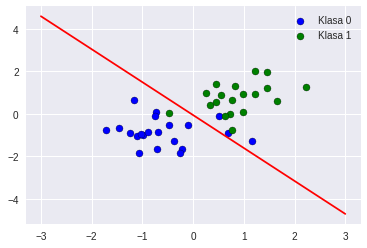

In [19]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# Korak 1: Učitavanje i obrada podataka.
filename = 'logreg_data.csv'
all_data = np.loadtxt(filename, delimiter=',')
data = dict()
data['x'] = all_data[:, :2]
data['y'] = all_data[:, 2]
nb_features = 2

# Nasumično mešanje.
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija. Ne normalizujemo y!
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
# data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

# NOVO: podela na trening, validacioni i test skup.
ratios = (0.6, 0.2, 0.2)

nb_train = int(ratios[0] * nb_samples)
data_train = dict()
data_train['x'] = data['x'][:nb_train]
data_train['y'] = data['y'][:nb_train]

nb_val = int(ratios[1] * nb_samples)
data_val = dict()
data_val['x'] = data['x'][nb_train:(nb_train+nb_val)]
data_val['y'] = data['y'][nb_train:(nb_train+nb_val)]

nb_test = nb_samples - nb_train - nb_val
data_test = dict()
data_test['x'] = data['x'][(nb_train+nb_val):]
data_test['y'] = data['y'][(nb_train+nb_val):]

# Korak 2: Model.
X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
Y = tf.placeholder(shape=(None), dtype=tf.float32)
w = tf.Variable(tf.zeros(nb_features))
bias = tf.Variable(0.0)

w_col = tf.reshape(w, (nb_features, 1))
hyp = tf.sigmoid(tf.add(tf.matmul(X, w_col), bias))

# Korak 3: Funkcija troška i optimizacija.
Y_col = tf.reshape(Y, (-1, 1))
loss = tf.reduce_mean(-tf.multiply(Y, tf.log(hyp)) 
                      -tf.multiply(1.0-Y, tf.log(1.0-hyp)))

opt_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga.
  nb_epochs = 100
  for epoch in range(nb_epochs):
    train_loss = 0
    for sample in range(nb_train):
      feed = {X: data_train['x'][sample].reshape((1, nb_features)), 
              Y: data_train['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      train_loss += curr_loss
        
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    train_loss /= nb_samples
    if (epoch + 1) % 10 == 0:
      print('Epoch: {}/{}| Train loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                                      train_loss))
 
  # Ispisujemo finalnu vrednost parametara.
  w_val = sess.run(w)
  bias_val = sess.run(bias)
  print('w = ', w_val, 'bias = ', bias_val)
  
  # Iscrtavanje test skupa i granice odluke.
  idxs = data_test['y'] == 0.0
  plt.scatter(data_test['x'][idxs, 0], data_test['x'][idxs, 1], c='b', 
              edgecolors='k', label='Klasa 0')
  plt.scatter(data_test['x'][~idxs, 0], data_test['x'][~idxs, 1], c='g', 
              edgecolors='k', label='Klasa 1')
  xs = np.linspace(-3, 3, 100)
  ys = (-bias_val - xs*w_val[0]) / w_val[1]
  plt.plot(xs.tolist(), ys.tolist(), color='r')
  plt.legend()
  
  # Na samom kraju ispisujemo metrike na test skupu.
  hyp_val = sess.run(hyp, feed_dict = {X: data_test['x']})
  predictions = np.ravel(hyp_val > 0.5).astype(int)
  positive_predictions = np.where(predictions == 1)
  negative_predictions = np.where(predictions == 0)
  TP = np.sum((data_test['y'][positive_predictions] == 1).astype(int))
  TN = np.sum((data_test['y'][negative_predictions] == 0).astype(int))
  FP = np.sum((data_test['y'][positive_predictions] == 0).astype(int))
  FN = np.sum((data_test['y'][negative_predictions] == 1).astype(int))
  print('Total test samples: {}'.format(nb_test))
  print('TP = {}, TN = {}, FP = {}, FN= {}'.format(
      TP, TN, FP, FN))
  accuracy = (TP + TN) / nb_test
  precision = TP / (TP + FP) if TP + FP > 0 else -1
  recall = TP / (TP + FN) if TP + FN > 0 else -1
  print('A = {:.2f}, P = {:.2f}, R = {:.2f}'.format(
      accuracy, precision, recall))


#Multinomijalna (multiclass) klasifikacija

Sada umesto binarne klasifikacije imamo problem klasifikacije u proizvoljan broj klasa ($C$).

Jedan način da adaptiramo ono što već imamo za problem više klasa je da istreniramo $C$ logističkih regresija pri čemu $i$-ta služi da klasifikuje primere na osnovu toga da li pripadaju ili ne pripadaju klasi $i$. Zatim tražimo klasifikator koji je dao pozitivan rezultat sa najvećom pouzdanošću. Ovaj metod se naziva **one-vs-all**. Takođe, možemo kreirati $\frac{C(C-1)}{2}$ binarnih klasifikatora, pri čemu će svaki biti istreniran da razlikuje konkretan par klasa. Ovaj metod se naziva **one-vs-one**.

Ova dva pristupa nisu idealna jer mogu dovesti do delova prostora koji bivaju klasifikovani u više klasa, ukoliko posmatramo pojedinačne klasfikatore. Bolje rešenje je **softmax regresija** tj. **multinomijalna logistička regresija**.







*   **Softmax regresija** je prirodan način da vršimo klasifikaciju u proizvoljan broj klasa
*  U standardnoj logističkoj regresiji za jedan ulazni primer dobijamo jedan broj koji (nakon primene sigmoidne funkcije) tretiramo kao verovatnoću da je primer u klasi 1 - u softmax regresiji jedan ulazni primer daje vektor dužine $C$
  * Taj vektor normalizujemo **softmax** funkcijom: $\sigma(z_i) = \frac{e^{z_i}}{\sum_\limits{c=1}^{C}e^{z_c}}$
* Model: umesto vektora težina imamo matricu težina, a umesto skalara za bias imamo vektor, na kraju primenjujemo softmax na hipotezu
* Funkcija troška: uopštavamo log loss funkciju troška koju smo imali u logističkoj regresiji
  * $Cost(h_\Theta(x), y) = -log(h_\Theta(x)_y)$
* Pogledajmo primer (**softmax_data.csv** skup podataka, ukupno tri klase: 0 1 i 2)
* [Više o softmax regresiji](https://mcerovic.github.io/notes/SoftmaxRegression/index.html)
* [Pristupačno objašnjenje softmax funkcije](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)

Epoch: 10/100| Train loss: 0.14156
Epoch: 20/100| Train loss: 0.11276
Epoch: 30/100| Train loss: 0.10147
Epoch: 40/100| Train loss: 0.09504
Epoch: 50/100| Train loss: 0.09079
Epoch: 60/100| Train loss: 0.08772
Epoch: 70/100| Train loss: 0.08539
Epoch: 80/100| Train loss: 0.08354
Epoch: 90/100| Train loss: 0.08204
Epoch: 100/100| Train loss: 0.08080
Test accuracy:  0.9166666666666666


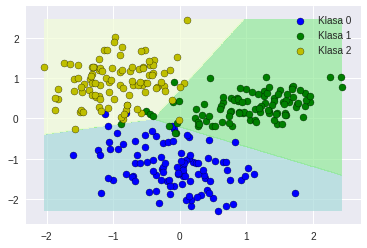

In [38]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# Korak 1: Učitavanje i obrada podataka.
filename = 'softmax_data.csv'
all_data = np.loadtxt(filename, delimiter=',')
data = dict()
data['x'] = all_data[:, :2]
data['y'] = all_data[:, 2]
nb_features = 2
nb_classes = 3

# Nasumično mešanje.
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija. Ne normalizujemo y!
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
# data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

# Podela na trening i test skup. Preskačemo validacioni skup jer imamo samo 
# jedan model.
train_ratio = 0.8

nb_train = int(train_ratio * nb_samples)
data_train = dict()
data_train['x'] = data['x'][:nb_train]
data_train['y'] = data['y'][:nb_train]

nb_test = nb_samples - nb_train
data_test = dict()
data_test['x'] = data['x'][nb_train:]
data_test['y'] = data['y'][nb_train:]

# Korak 2: Model.
X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
Y = tf.placeholder(shape=(None), dtype=tf.int32)
w = tf.Variable(tf.random_normal([nb_features, nb_classes]))
bias = tf.Variable(tf.random_normal([nb_classes]))

hyp = tf.nn.softmax(tf.add(tf.matmul(X, w), bias))

# Prediction je indeks maksimalnog broja u svakom redu.
pred = tf.argmax(hyp, axis = 1)  

# Korak 3: Funkcija troška i optimizacija.

# Koristicemo "one-hot" vektor za korektne klase. Ovo od vektora dužine M
# kreira matricu MxC, pri čemu svaki red ima tačno jednu jedinicu na 
# odgovarajućem indeksu, i sve ostale nule.
Y_onehot = tf.one_hot(Y, nb_classes)

# "Maskiramo" hipotezu tako sto zadrzavamo samo brojeve uz target klasu.
hyp_masked = tf.multiply(Y_onehot, tf.log(hyp))
loss = tf.reduce_mean(-tf.reduce_sum(hyp_masked, axis=1))

opt_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga.
  nb_epochs = 100
  for epoch in range(nb_epochs):
    train_loss = 0
    for sample in range(nb_train):
      feed = {X: data_train['x'][sample].reshape((1, nb_features)), 
              Y: data_train['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      train_loss += curr_loss
        
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    train_loss /= nb_samples
    if (epoch + 1) % 10 == 0:
      print('Epoch: {}/{}| Train loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                                      train_loss))
  # Na samom kraju ispisujemo metrike na test skupu.
  pred_val = sess.run(pred, feed_dict = {X: data_test['x']})
  accuracy = np.mean(np.equal(pred_val, data_test['y']).astype(np.int32))
  print('Test accuracy: ', accuracy)
  
  # Na grafik dodajemo delove prostora koji odgovaraju klasama iz pespektive
  # naše hipoteze.
  
  # Generisemo grid.
  step_size = 0.01
  x1, x2 = np.meshgrid(np.arange(min(data['x'][:, 0]), max(data['x'][:, 0]), 
                                 step_size),
                       np.arange(min(data['x'][:, 1]), max(data['x'][:, 1]), 
                                 step_size))
  x_feed = np.vstack((x1.flatten(), x2.flatten())).T

  # Racunamo vrednost hipoteze.
  pred_val = sess.run(pred, feed_dict={X: x_feed})
  pred_plot = pred_val.reshape([x1.shape[0], x1.shape[1]])

  # Crtamo contour plot.
  from matplotlib.colors import LinearSegmentedColormap
  classes_cmap = LinearSegmentedColormap.from_list('classes_cmap', 
                                                   ['lightblue', 
                                                    'lightgreen', 
                                                    'lightyellow'])
  plt.contourf(x1, x2, pred_plot, cmap=classes_cmap, alpha=0.7)
  
  # Crtamo sve podatke preko.
  idxs_0 = data['y'] == 0.0
  idxs_1 = data['y'] == 1.0
  idxs_2 = data['y'] == 2.0
  plt.scatter(data['x'][idxs_0, 0], data['x'][idxs_0, 1], c='b', 
              edgecolors='k', label='Klasa 0')
  plt.scatter(data['x'][idxs_1, 0], data['x'][idxs_1, 1], c='g', 
              edgecolors='k', label='Klasa 1')
  plt.scatter(data['x'][idxs_2, 0], data['x'][idxs_2, 1], c='y', 
              edgecolors='k', label='Klasa 2')
  plt.legend()
  # Uporediti plot za 1 i 100 epoha.
  